# 🌾 Crop Yield Prediction Project

This notebook presents a comprehensive machine learning pipeline for predicting crop yield. We will explore different models and compare their performance using accuracy and other metrics.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')


🧼 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  int64  
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  int64  
 3   State            19689 non-null  int64  
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.5 MB

🔍 Null Values:
 Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

📊 Unique Crops:
 Crop
40    1197

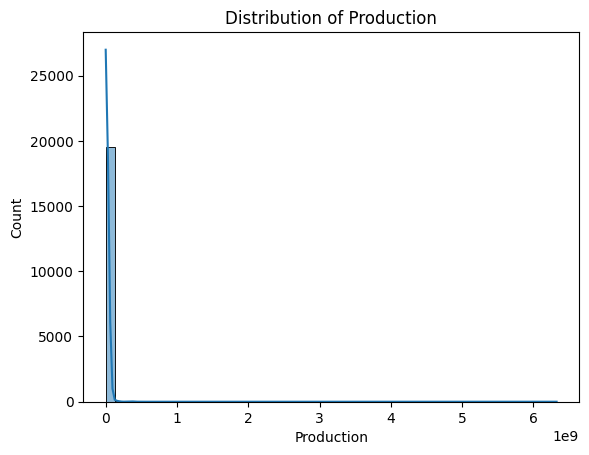

In [8]:
# 📊 Step 3: EDA (Exploratory Data Analysis)
print("🧼 Dataset Info:")
df.info()

print("\n🔍 Null Values:\n", df.isnull().sum())

print("\n📊 Unique Crops:\n", df["Crop"].value_counts().head(10))

# Visualize target variable distribution
sns.histplot(df['Production'], bins=50, kde=True)
plt.title("Distribution of Production")
plt.show()


In [9]:
# 🧹 Step 4: Data Preprocessing

# Drop rows with missing or zero area/production
df = df[(df['Area'] > 0) & (df['Production'] > 0)]

# Label Encoding for categorical variables
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])

# Create Yield column
df['Yield'] = df['Production'] / df['Area']

df = df[['State', 'Season', 'Crop_Year', 'Crop', 'Area', 'Production', 'Yield']]

df.head()


,State,Season,Crop_Year,Crop,Area,Production,Yield
0,2,4,1997,0,73814.0,56708,0.768255
1,2,1,1997,1,6637.0,4685,0.705891
2,2,1,1997,8,796.0,22,0.027638
3,2,4,1997,9,19656.0,126905000,6456.298331
4,2,1,1997,11,1739.0,794,0.456584


In [10]:
# 📈 Step 5: Feature and Target Selection
X = df.drop(columns=['Yield', 'Production'])  # Features
y = df['Yield']                               # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 🤖 Step 6: Train Models and Compare

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    # "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": round(mse, 4),
        "R2 Score": round(r2, 4)
    }

# Create a result DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)
results_df


,MSE,R2 Score
Decision Tree,88659.2015,0.8834
Random Forest,90630.6520,0.8808
Linear Regression,736997.1018,0.0308


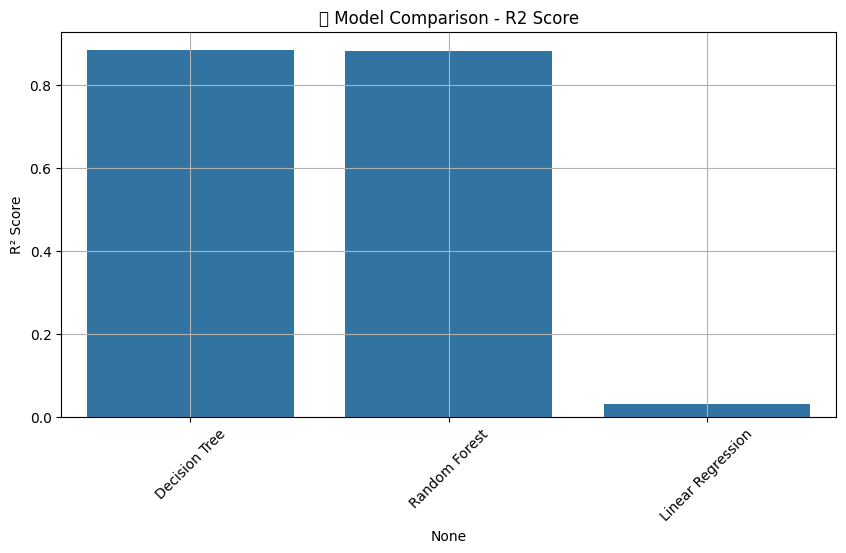

In [13]:
# 📊 Step 7: Visualize Model Comparison
plt.figure(figsize=(10,5))
sns.barplot(x=results_df.index, y=results_df["R2 Score"])
plt.title("📈 Model Comparison - R2 Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [14]:
# 💾 Step 8: Export Best Model (Random Forest or XGBoost)
best_model_name = results_df.index[0]
best_model = models[best_model_name]

import pickle
pickle.dump(best_model, open("best_crop_yield_model.pkl", "wb"))

print(f"✅ Exported best model: {best_model_name}")


✅ Exported best model: Decision Tree


In [2]:
# Load the dataset
df = pd.read_csv("crop_yield.csv")
df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


## 🔍 Data Overview

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


## 🧹 Data Preprocessing

In [5]:
# Encode categorical variables
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])

# Drop rows with missing values if any
df.dropna(inplace=True)

# Features and target
X = df.drop(columns=["Yield", "Production", "Crop"])
y = df["Yield"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 🤖 Model Training and Evaluation

In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2 Score": r2}
    print(f"{name} -> RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")


Linear Regression -> RMSE: 886.36, R2 Score: 0.02
Decision Tree -> RMSE: 695.97, R2 Score: 0.40
Random Forest -> RMSE: 591.27, R2 Score: 0.56
Support Vector Regressor -> RMSE: 898.27, R2 Score: -0.01
K-Nearest Neighbors -> RMSE: 758.01, R2 Score: 0.28


## 📊 Model Performance Comparison

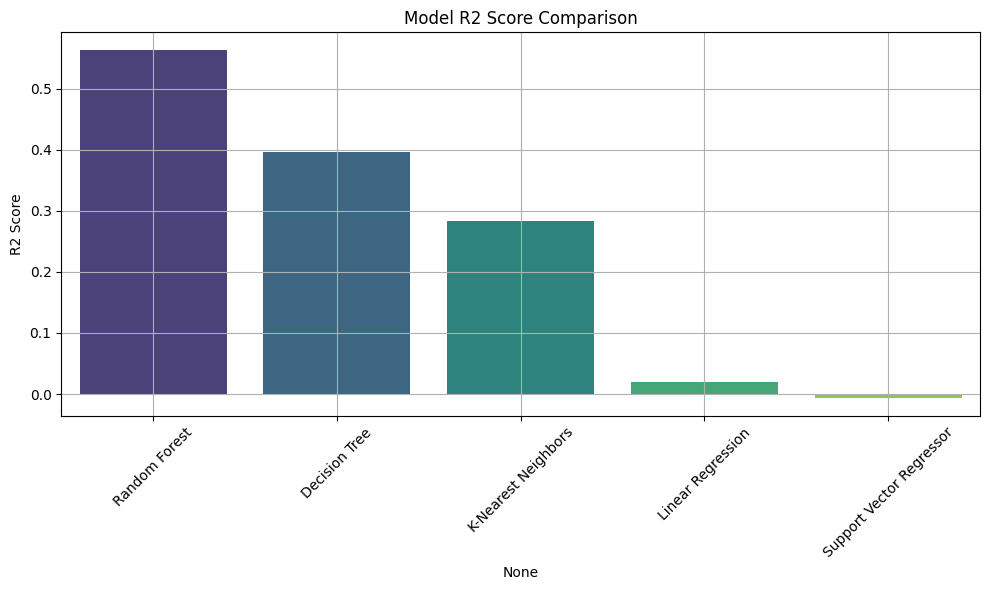

In [7]:
result_df = pd.DataFrame(results).T
result_df.sort_values(by="R2 Score", ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=result_df.index, y=result_df["R2 Score"], palette="viridis")
plt.title("Model R2 Score Comparison")
plt.xticks(rotation=45)
plt.ylabel("R2 Score")
plt.grid(True)
plt.tight_layout()
plt.show()
